In [1]:
import torch
from torch import nn
#https://machinelearningmastery.com/practical-guide-to-gan-failure-modes/
import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.utils.data
#from torch.utils.tensorboard import SummaryWriter

#writer = SummaryWriter('runs/gan_experiment_1')

#torch.manual_seed(2)

device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
transform = transforms.Compose(
    [
        transforms.ToTensor(), 
        #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)    

train_set = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
test_set = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print('Train', train_set)
print('Test', test_set)

Train Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Test Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [4]:
batch_size = 4
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=batch_size, shuffle=True
)
print(device)

cuda


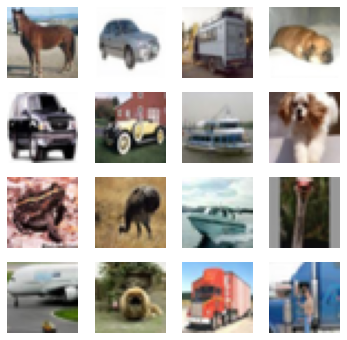

In [5]:
figure = plt.figure(figsize=(6, 6))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    img = np.transpose(img.reshape(3, 32, 32), (1, 2, 0))
    plt.imshow(img.squeeze())
plt.show()

In [6]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(128, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(128, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(128, 3, kernel_size=3),
            nn.Tanh(),
        )
        self.first = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(),
        )
        self.second = nn.Sequential(
            nn.ConvTranspose2d(128, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(),
        )
        self.third = nn.Sequential(
            nn.ConvTranspose2d(128, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(),
        )
        self.four = nn.Sequential(
            nn.Conv2d(128, 3, kernel_size=3, padding=1),
            nn.Tanh(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 256, 4, 4)
        output = self.first(x)
        #print(output.shape)
        output = self.second(output)
        #print(output.shape)
        output = self.third(output)
        #print(output.shape)
        output = self.four(output)
        #print(output.shape)
        output = output.view(x.size(0), 3, 32, 32)
        return output

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.con_layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=2, stride=2),
            nn.LeakyReLU(),
            #nn.Dropout(0.3),
            nn.Conv2d(64, 128, kernel_size=3, padding=2, stride=2),
            nn.LeakyReLU(),
            #nn.Dropout(0.3),
            nn.Conv2d(128, 128, kernel_size=3, padding=2, stride=2),
            nn.LeakyReLU(),
            #nn.Dropout(0.3),
            nn.Conv2d(128, 256, kernel_size=3, padding=2, stride=2),
            nn.LeakyReLU(),
            #nn.Dropout(0.3),  
        )
        
        self.linear_layer = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(4096, 1),
            nn.Sigmoid(),
        )
        

    def forward(self, x):
        x = x.view(x.size(0), 3, 32, 32)
        x = self.con_layer(x)
        x = self.linear_layer(x)
        return x

In [8]:
def train_descriminator(X, y, d_model, loss_fn, opti):
    #print(train_descriminator)
    discriminator.zero_grad()
    output = model(X)
    loss_discriminator = loss_fn(output, y)
    loss_discriminator.backward()
    opti.step
    
def train_generator(g_model, d_model):
    #print(train_generator)
    latent_space_samples = torch.rand((batch_size, 4096)).to(device)
    #latent_space_samples = latent_space_samples * 2 - 1 # 0,1 to -1,1
    
    inverted_labels = torch.ones((batch_size, 1)).to(
        device=device
    )
    
    generator.zero_grad()
    generated_samples = gen_model(latent_space_samples)
    output_discriminator_generated = dis_model(generated_samples)
    loss_generator = loss_function_generator(
        output_discriminator_generated, inverted_labels # inverted labels
    )
    loss_generator.backward()
    optimizer_generator.step()

In [9]:
train_features, train_labels = next(iter(train_loader))
#X = train_features * 2 - 1
data = torch.utils.data.RandomSampler(train_set, False, batch_size, None)
print(len(data))

4


In [10]:
def generate_fake_samples():
    # Fake data for training the discriminator 0-1
    latent_space_samples = torch.rand((batch_size, 4096))
    #latent_space_samples = latent_space_samples * 2 - 1 # 0,1 to -1,1
    #print((latent_space_samples))
    #print((latent_space_samples))
    latent_space_samples = latent_space_samples.to(device)
    
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
    return generated_samples, generated_samples_labels

In [11]:
def train(dis, gen, opti_dis, opti_gen):
    bat_per_epo = int(len(train_set) / batch_size)
    half_batch = int(batch_size / 2)
    # manually enumerate epochs
    for i in range(num_epochs):
        for n, (real_samples, labels) in enumerate(train_loader):
            # get randomly selected real samples
            real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
            
            # train dis
            train_descriminator(real_samples, real_samples_labels, dis, opti_dis)
            
            # get fake samples
            generated_samples, generated_samples_labels = generate_fake_samples()
            
            # train dis
            train_descriminator(generated_samples, generated_samples_labels, dis, opti_dis)
            
            # prepare latent space as input for gen
            #latent_space_samples = torch.rand((batch_size, 4096)).to(device)
            
            # create labels for gen
            
            # train gan
            train_generator(dis, gen, opti_dis, opti_gen)

In [ ]:
discriminator = Discriminator().to(device)
generator = Generator().to(device=device)

lr = 0.0002
num_epochs = 200

loss_function_discriminator = nn.BCELoss()
loss_function_generator = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

train(discriminator, generator, optimizer_discriminator, optimizer_generator)